# Testing notebook

In [1]:
from src.data.embs import ImageDataset


In [2]:
im_data = ImageDataset(image_dir='./datasets/CIRR/images/dev')


In [3]:
l = list(im_data.image_dir.glob("*.jpg")) + list(
            im_data.image_dir.glob("*.png")
        )
print(l[0])

datasets/CIRR/images/dev/dev-1009-0-img0.png


In [4]:
l[0].stem

'dev-1009-0-img0'

In [2]:
from pathlib import Path
image_dir = Path("datasets/CIRR/images/dev")

In [13]:
subdirectories = [subdir for subdir in image_dir.iterdir() if subdir.is_dir()]

if len(subdirectories) == 0:
    save_dir = image_dir.parent / f"blip-embs-base"
    #save_dir.mkdir(exist_ok=True)
    print(save_dir)
    
else:
    for subdir in subdirectories:
        image_dir = subdir
        save_dir = (
            subdir.parent.parent / f"blip-embs-base" / subdir.name
        )
        #save_dir.mkdir(exist_ok=True, parents=True)
        print(save_dir)

datasets/CIRR/images/blip-embs-base


In [4]:
import json
annotation = json.load(open(Path("annotation/cirr/cap.rc2.train.json"), "r"))

In [6]:
len(annotation)

28225

In [14]:
annotation[1]['reference']

'train-11041-2-img0'

In [17]:
from src.data.cirr import *
test_img_dir = Path("datasets/CIRR/images/test1")
test_ann_dir = Path("annotation/cirr/cap.rc2.test1.json")


In [3]:
import csv

# Create lists (or NumPy arrays)
row1 = ["epoch1", 1, 2, 3, 4, 5]
row2 = [6, 7, 8, 9, 10]

# Write the first row to the CSV file
with open("array.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(row1)  # Write a single row

# Append the second row to the CSV file
with open("array.csv", "a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(row2)  # Append a single row


In [5]:
import torch
t = torch.ones((32, 4, 3))
t.shape

torch.Size([32, 4, 3])

In [7]:
w = torch.nn.Linear()

torch.Size([32, 3])

In [10]:
import torch

# Define W and matrices v1, v2, v3
W = torch.tensor([0.5, 1.0, 1.5])  # Shape: (3,)
B, D = 2, 256  # Batch size and feature dimension
v1 = torch.randn(B, D)  # Shape: (B, 256)
v2 = torch.randn(B, D)  # Shape: (B, 256)
v3 = torch.randn(B, D)  # Shape: (B, 256)

# Compute the result using the formula
v_stack = torch.stack([v1, v2, v3], dim=0)  # Shape: (3, B, 256)
result = torch.einsum('i,ibj->bj', W, v_stack)  # Shape: (B, 256)

# Verify the result with the explicit computation
expected_result = W[0] * v1 + W[1] * v2 + W[2] * v3

# Check if they are close
print("Are the results close? ", torch.allclose(result, expected_result))

# Optional: print the results for debugging
print("Result from einsum: ", result.shape)
print("Result from explicit computation: ", expected_result.shape)


Are the results close?  True
Result from einsum:  torch.Size([2, 256])
Result from explicit computation:  torch.Size([2, 256])


## Testing the heatmap

In [15]:
def f(x, y):
    return x**2 + y**2, x*y, np.sin(x + y)  # Example: Three quantities


In [16]:
import numpy as np

# Define ranges for x and y
x_values = np.linspace(0, 1, 500)
y_values = np.linspace(0, 1, 500)

# Initialize lists to store valid points and results
x_valid = []
y_valid = []
z1_valid = []
z2_valid = []
z3_valid = []

# Compute f(x, y) using nested loops
for x in x_values:
    for y in y_values:
        if x + y < 1:  # Check the constraint
            x_valid.append(x)
            y_valid.append(y)
            z1, z2, z3 = f(x, y)
            z1_valid.append(z1)
            z2_valid.append(z2)
            z3_valid.append(z3)

# Convert lists to arrays
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)
z1_valid = np.array(z1_valid)
z2_valid = np.array(z2_valid)
z3_valid = np.array(z3_valid)


In [17]:
# Save the data to a file
np.savez("heatmap_data_feasible_3quantities.npz", x=x_valid, y=y_valid, z1=z1_valid, z2=z2_valid, z3=z3_valid)

# Load the data
data = np.load("heatmap_data_feasible_3quantities.npz")
x_valid = data["x"]
y_valid = data["y"]
z1_valid = data["z1"]
z2_valid = data["z2"]
z3_valid = data["z3"]

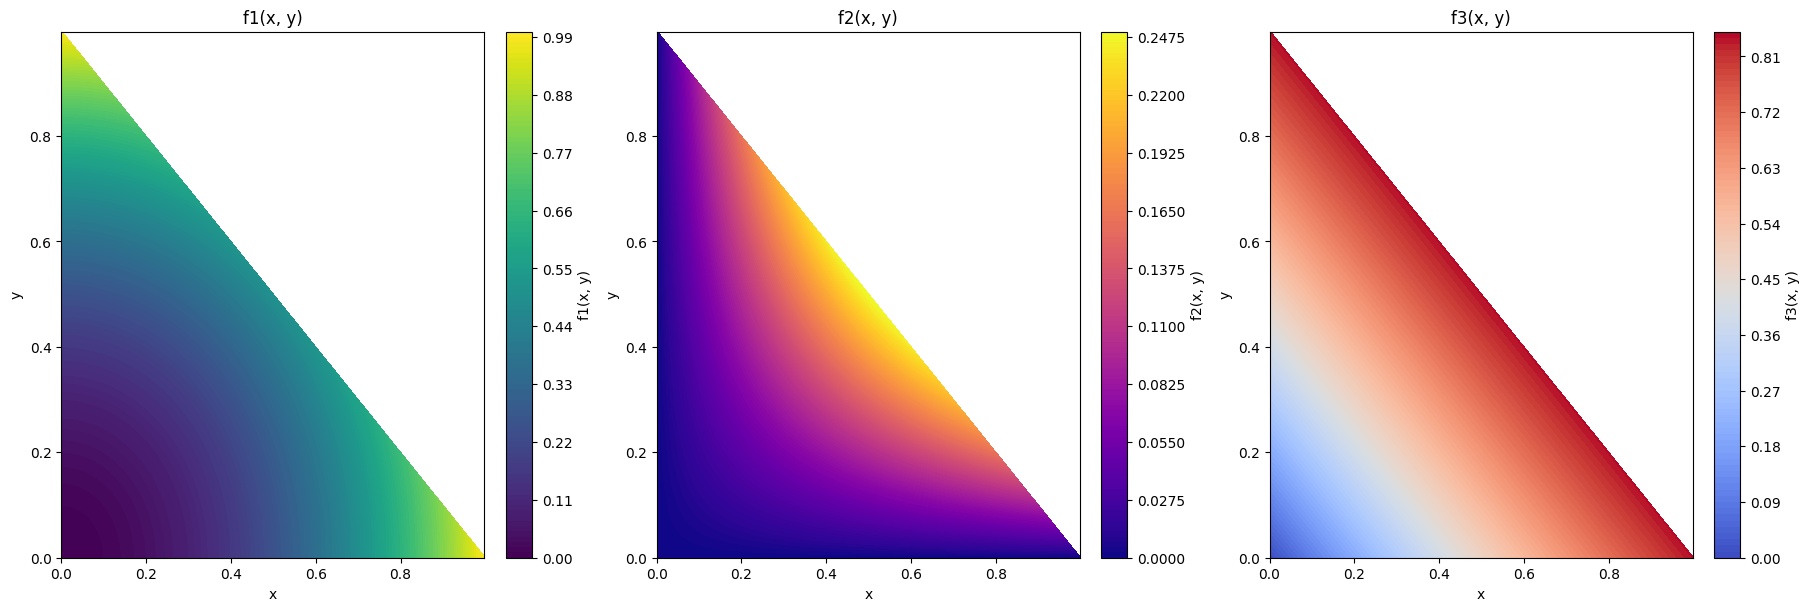

In [18]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot each quantity
heatmap1 = axes[0].tricontourf(x_valid, y_valid, z1_valid, levels=100, cmap='viridis')
axes[0].set_title('f1(x, y)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
fig.colorbar(heatmap1, ax=axes[0], label='f1(x, y)')

heatmap2 = axes[1].tricontourf(x_valid, y_valid, z2_valid, levels=100, cmap='plasma')
axes[1].set_title('f2(x, y)')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
fig.colorbar(heatmap2, ax=axes[1], label='f2(x, y)')

heatmap3 = axes[2].tricontourf(x_valid, y_valid, z3_valid, levels=100, cmap='coolwarm')
axes[2].set_title('f3(x, y)')
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
fig.colorbar(heatmap3, ax=axes[2], label='f3(x, y)')

# Show the plot
plt.show()


In [1]:
agg = "mean"
print(f"heatmap_{agg}.npz")

heatmap_mean.npz
